In [1]:
#the torch init

import torch

In [2]:
#libraries

import numpy 
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
import torch.nn as  nn
from torch.utils.data import TensorDataset , DataLoader
import torchmetrics
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#linear reg using tensors and autograd
#it apparently worked here maybe cuz i updated wsl
housing = fetch_california_housing()


In [4]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [5]:
housing.target_names

['MedHouseVal']

In [6]:
x_train_full , x_test , y_train_full , y_test = train_test_split(housing.data , housing.target ,
                                                                 test_size=0.15,random_state=42)

In [7]:
type(x_train_full)

numpy.ndarray

In [8]:
y_train_full.shape

(17544,)

In [9]:
y_train_full.shape

(17544,)

In [10]:
x_train , x_valid , y_train , y_valid = train_test_split(x_train_full , y_train_full ,
                                                         test_size=0.15 ,random_state=42)

In [11]:
x_valid.shape

(2632, 8)

In [12]:
x_train = torch.FloatTensor(x_train)                #float tensor auto converts array into 32 bit float 
                                                    #dont need 64 bit float to preserve memory 
x_valid = torch.FloatTensor(x_valid)
x_test = torch.FloatTensor(x_test)
means = x_train.mean(dim=0 , keepdims=True)
stds = x_train.std(dim=0 , keepdims=True)
x_train = (x_train - means)/stds                    #standard scaler z score aka standard scaler
x_valid = (x_valid - means)/stds
x_test = (x_test - means)/stds



In [13]:
y_train = torch.FloatTensor(y_train).reshape(-1 , 1) 
y_valid = torch.FloatTensor(y_valid).reshape(-1 , 1)
y_test = torch.FloatTensor(y_test).reshape(-1 , 1)



In [14]:
torch.manual_seed(42)  #just like rng = numpy.random.default_rng
n_features = x_train.shape[1]
w = torch.rand((n_features , 1) , requires_grad=True) #random initial weights column matrix 
b = torch.tensor(0. , requires_grad=True) #bias
 

In [15]:
#linear reg

learning_rate = 0.42
n_epoch = 20

for epoch in range(n_epoch):
    y_pred = x_train @ w + b
    loss = ((y_pred - y_train) **2).mean()
    loss.backward()
    
    with torch.no_grad():
        b -= learning_rate * b.grad
        w -= learning_rate * w.grad 
        b.grad.zero_()
        w.grad.zero_()
    
    print(f"Epoch  : {epoch + 1}/{n_epoch} , loss: {loss.item()}")
    

Epoch  : 1/20 , loss: 7.675676345825195
Epoch  : 2/20 , loss: 1.4036966562271118
Epoch  : 3/20 , loss: 0.9067614674568176
Epoch  : 4/20 , loss: 0.7670203447341919
Epoch  : 5/20 , loss: 0.7075631618499756
Epoch  : 6/20 , loss: 0.6758161187171936
Epoch  : 7/20 , loss: 0.6550825834274292
Epoch  : 8/20 , loss: 0.6394436955451965
Epoch  : 9/20 , loss: 0.6266301274299622
Epoch  : 10/20 , loss: 0.6156783103942871
Epoch  : 11/20 , loss: 0.6061199903488159
Epoch  : 12/20 , loss: 0.5976894497871399
Epoch  : 13/20 , loss: 0.5902113318443298
Epoch  : 14/20 , loss: 0.583556592464447
Epoch  : 15/20 , loss: 0.5776218771934509
Epoch  : 16/20 , loss: 0.5723215341567993
Epoch  : 17/20 , loss: 0.5675822496414185
Epoch  : 18/20 , loss: 0.5633400082588196
Epoch  : 19/20 , loss: 0.5595393776893616
Epoch  : 20/20 , loss: 0.55613112449646


In [16]:
x_new = x_test[:3]
with torch.no_grad():
    y_pred = x_new @ w + b
    
y_pred

tensor([[0.8881],
        [1.6331],
        [2.6347]])

In [17]:
y_test[:3]

tensor([[0.4770],
        [0.4580],
        [5.0000]])

In [18]:
#with pytorch high level api
torch.manual_seed(42)
model = nn.Linear(in_features=n_features , out_features=1)



In [19]:
model.bias

Parameter containing:
tensor([0.3117], requires_grad=True)

In [20]:
model.weight

Parameter containing:
tensor([[ 0.2703,  0.2935, -0.0828,  0.3248, -0.0775,  0.0713, -0.1721,  0.2076]],
       requires_grad=True)

In [21]:
#predictions on the untrained model 

model(x_train[:2])

tensor([[-0.2994],
        [ 0.4421]], grad_fn=<AddmmBackward0>)

In [22]:
optimizer = torch.optim.SGD(model.parameters() , lr=learning_rate)
mse = nn.MSELoss()

In [23]:
def train_bgd(model , optimizer , criterion , x_train , y_train , n_epochs):
    for epoch in range(n_epochs):
        y_pred = model(x_train)         #forward pass
        loss = criterion(y_pred , y_train)
        loss.backward()         #backward pass
        optimizer.step()        #w and b update
        optimizer.zero_grad()   #reset gradident 
        print(f"Epoch {epoch + 1}/{n_epoch} , loss : {loss.item()}")

In [24]:
train_bgd(model , optimizer , mse , x_train , y_train , n_epoch)

Epoch 1/20 , loss : 4.255925178527832
Epoch 2/20 , loss : 0.7294355034828186
Epoch 3/20 , loss : 0.6195604801177979
Epoch 4/20 , loss : 0.602250337600708
Epoch 5/20 , loss : 0.5914240479469299
Epoch 6/20 , loss : 0.5829207301139832
Epoch 7/20 , loss : 0.5758294463157654
Epoch 8/20 , loss : 0.5697504281997681
Epoch 9/20 , loss : 0.5644665360450745
Epoch 10/20 , loss : 0.5598403811454773
Epoch 11/20 , loss : 0.5557737350463867
Epoch 12/20 , loss : 0.5521905422210693
Epoch 13/20 , loss : 0.5490285158157349
Epoch 14/20 , loss : 0.5462350845336914
Epoch 15/20 , loss : 0.5437654256820679
Epoch 16/20 , loss : 0.541580319404602
Epoch 17/20 , loss : 0.5396457314491272
Epoch 18/20 , loss : 0.5379319787025452
Epoch 19/20 , loss : 0.53641277551651
Epoch 20/20 , loss : 0.5350652933120728


In [25]:
#prediction on model trained on the high level api

x_new = x_test[:3]
with torch.no_grad():
    y_pred = model(x_new)
    
y_pred

tensor([[0.8274],
        [1.6817],
        [2.6073]])

In [26]:
y_test[:3]

tensor([[0.4770],
        [0.4580],
        [5.0000]])

In [27]:
torch.manual_seed(42)
model = nn.Sequential(
    nn.Linear(n_features , 50),
    nn.ReLU(),                      #activation function
    nn.Linear(50 , 40),
    nn.ReLU(),
    nn.Linear(40 , 1)
)


#neural networks is just a stack of different modules 

In [28]:
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters() , lr=learning_rate)
mse = nn.MSELoss()

In [29]:
train_bgd(model , optimizer , mse , x_train , y_train , n_epoch)

Epoch 1/20 , loss : 4.971199035644531
Epoch 2/20 , loss : 2.082613229751587
Epoch 3/20 , loss : 1.0319751501083374
Epoch 4/20 , loss : 0.8798990249633789
Epoch 5/20 , loss : 0.793497622013092
Epoch 6/20 , loss : 0.7400871515274048
Epoch 7/20 , loss : 0.7060401439666748
Epoch 8/20 , loss : 0.6836375594139099
Epoch 9/20 , loss : 0.66815185546875
Epoch 10/20 , loss : 0.6567362546920776
Epoch 11/20 , loss : 0.6476631164550781
Epoch 12/20 , loss : 0.6399692893028259
Epoch 13/20 , loss : 0.6331510543823242
Epoch 14/20 , loss : 0.6269358396530151
Epoch 15/20 , loss : 0.6211158633232117
Epoch 16/20 , loss : 0.6156110763549805
Epoch 17/20 , loss : 0.6103643178939819
Epoch 18/20 , loss : 0.6053221225738525
Epoch 19/20 , loss : 0.6004666090011597
Epoch 20/20 , loss : 0.5957775115966797


In [30]:
train_dataset = TensorDataset(x_train , y_train)
train_loader = DataLoader(train_dataset , batch_size=32 , shuffle=True , pin_memory=True)

In [31]:
torch.manual_seed(42)
model = nn.Sequential(
    nn.Linear(n_features , 50),
    nn.ReLU(),
    nn.Linear(50 , 40),
    nn.ReLU(),
    nn.Linear(40 , 1)
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

In [32]:
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters() , lr = learning_rate)
mse = nn.MSELoss()

In [33]:
def train(model , optimizer , criterion , 
          train_loader , n_epochs):
    model.train()
    for epoch in range(n_epochs):
        total_loss = 0
        for x_batch , y_batch in train_loader:
            x_batch , y_batch = x_batch.to(device) , y_batch.to(device)
            y_pred = model(x_batch)
            loss = criterion(y_pred , y_batch)
            total_loss += loss.item()
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        mean_loss = total_loss / len(train_loader)
        print(f"Epoch {epoch + 1}/{n_epoch} , loss: {mean_loss:.4f}")
    

In [34]:
train(model , optimizer , mse , 
      train_loader , n_epoch)

Epoch 1/20 , loss: 0.6036
Epoch 2/20 , loss: 0.4386


Epoch 3/20 , loss: 0.4034
Epoch 4/20 , loss: 0.3873
Epoch 5/20 , loss: 0.3745
Epoch 6/20 , loss: 0.3642
Epoch 7/20 , loss: 0.3601
Epoch 8/20 , loss: 0.3504
Epoch 9/20 , loss: 0.3459
Epoch 10/20 , loss: 0.3424
Epoch 11/20 , loss: 0.3350
Epoch 12/20 , loss: 0.3296
Epoch 13/20 , loss: 0.3287
Epoch 14/20 , loss: 0.3240
Epoch 15/20 , loss: 0.3229
Epoch 16/20 , loss: 0.3174
Epoch 17/20 , loss: 0.3128
Epoch 18/20 , loss: 0.3116
Epoch 19/20 , loss: 0.3074
Epoch 20/20 , loss: 0.3052


In [35]:
#evaluation

def evaluate(model , data_loder , metric_fn , aggregate_fn = torch.mean):
    model.eval()
    metrics = []
    with torch.no_grad():
        for x_batch , y_batch in data_loder:
            x_batch , y_batch = x_batch.to(device) , y_batch.to(device)
            y_pred = model(x_batch)
            metric = metric_fn(y_pred , y_batch)
            metrics.append(metric)
        
    return aggregate_fn(torch.stack(metrics))

In [36]:
def rmse(y_pred , y_true):
    return ((y_true - y_pred)**2).mean().sqrt()



In [37]:
valid_dataset = TensorDataset(x_valid , y_valid)
valid_loader  = DataLoader(valid_dataset)

valid_mse = evaluate(model , valid_loader , nn.MSELoss())

In [38]:
valid_mse

tensor(0.3075, device='cuda:0')

In [39]:
valid_rmse = evaluate(model , valid_loader , nn.MSELoss() , 
                      aggregate_fn= lambda metrics : torch.sqrt(torch.mean(metrics)))

valid_rmse

tensor(0.5545, device='cuda:0')

In [40]:
#using torch metrics library

In [41]:
def evaluate_tm(model , data_loader , metric):
    model.eval()
    metric.reset() #used this cuz it stores prev states suppose we used it before say 
                   #we used the function before too so the metric will store that state 
                   #hence we should reset it.
    
    with torch.no_grad():
        for x_batch , y_batch in data_loader:
            x_batch , y_batch = x_batch.to(device) , y_batch.to(device)
            y_pred = model(x_batch)
            metric.update(y_pred , y_batch)
            
    return metric.compute()
            

In [42]:
rmse = torchmetrics.MeanSquaredError(squared=False).to(device)
evaluate_tm(model , valid_loader , rmse)

tensor(0.5545, device='cuda:0')

In [43]:
train_dataset = TensorDataset(x_train , y_train)
train_loader = DataLoader(train_dataset , batch_size=100 , shuffle = True , pin_memory=True)

Epoch : 1/20,train loss : 0.9500,traiin metrics : 0.976492,valid metrics : 0.788282
Epoch : 2/20,train loss : 0.5775,traiin metrics : 0.760761,valid metrics : 0.740870
Epoch : 3/20,train loss : 0.5253,traiin metrics : 0.725412,valid metrics : 0.711681
Epoch : 4/20,train loss : 0.4928,traiin metrics : 0.702908,valid metrics : 0.691542
Epoch : 5/20,train loss : 0.4680,traiin metrics : 0.685077,valid metrics : 0.672276
Epoch : 6/20,train loss : 0.4509,traiin metrics : 0.672597,valid metrics : 0.662545
Epoch : 7/20,train loss : 0.4376,traiin metrics : 0.662549,valid metrics : 0.653513
Epoch : 8/20,train loss : 0.4275,traiin metrics : 0.654703,valid metrics : 0.654755
Epoch : 9/20,train loss : 0.4197,traiin metrics : 0.648187,valid metrics : 0.639135
Epoch : 10/20,train loss : 0.4197,traiin metrics : 0.643410,valid metrics : 0.637355
Epoch : 11/20,train loss : 0.4085,traiin metrics : 0.639512,valid metrics : 0.632628
Epoch : 12/20,train loss : 0.4036,traiin metrics : 0.634477,valid metrics 

Text(0, 0.5, 'RMSE')

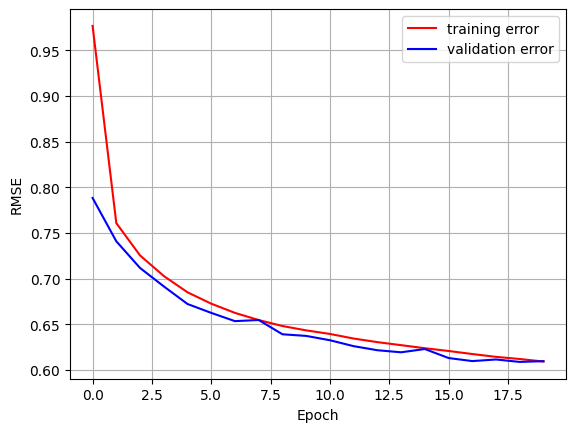

In [44]:
def train_2(model , optimizer , criterion , metric , train_loader,
            valid_loader , n_epoch):
    
    history = {"train_loss" : [] , "train_metrics" : [] , "valid_metrics" : []}
    
    for epoch in range(n_epoch):
        total_loss = 0
        metric.reset()
        for x_batch , y_batch in train_loader:
            model.train()
            x_batch , y_batch = x_batch.to(device) , y_batch.to(device)
            y_pred = model(x_batch)
            loss = criterion(y_pred , y_batch)
            total_loss += loss.item()
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            metric.update(y_pred , y_batch)
            
        mean_loss = total_loss/len(train_loader)
        history["train_loss"].append(mean_loss)
        history["train_metrics"].append(metric.compute().item())
        history["valid_metrics"].append(
            evaluate_tm(model , valid_loader , metric).item()
        )
        
        print(f"Epoch : {epoch +1}/{n_epoch},"
              f"train loss : {history['train_loss'][-1]:.4f},"
              f"traiin metrics : {history['train_metrics'][-1]:4f},"
              f"valid metrics : {history['valid_metrics'][-1]:4f}")
        
    return history

#model
torch.manual_seed(42)
learning_rate = 0.01
model = nn.Sequential(
    nn.Linear(n_features , 50),
    nn.ReLU(),
    nn.Linear(50 , 40),
    nn.ReLU(),
    nn.Linear(40 , 1)   
)
n_epoch = 20
model = model.to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
mse = nn.MSELoss()
rmse = torchmetrics.MeanSquaredError(squared=False).to(device)
history = train_2(model , optimizer , mse , rmse , train_loader , 
                  valid_loader , n_epoch)

#learning curve

plt.plot(np.arange(n_epoch) , history['train_metrics'] , "r-" , 
         label="training error")
plt.plot(np.arange(n_epoch) , history['valid_metrics'] , "b-" , 
         label="validation error")
plt.grid()
plt.legend(loc="upper right")
plt.xlabel("Epoch")
plt.ylabel("RMSE")